In [185]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gold-silver-platinum-prices-1969-now-usd-gbp-eur/gold_prices.csv
/kaggle/input/gold-silver-platinum-prices-1969-now-usd-gbp-eur/platinum_prices.csv
/kaggle/input/gold-silver-platinum-prices-1969-now-usd-gbp-eur/silver_prices.csv


# **Import**

In [186]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# **1. Data Import & EDA**

In [187]:
gold = pd.read_csv('/kaggle/input/gold-silver-platinum-prices-1969-now-usd-gbp-eur/gold_prices.csv')
platinum = pd.read_csv('/kaggle/input/gold-silver-platinum-prices-1969-now-usd-gbp-eur/platinum_prices.csv')
silver = pd.read_csv('/kaggle/input/gold-silver-platinum-prices-1969-now-usd-gbp-eur/silver_prices.csv')

* **Date - The date (GMT) in format %d/%m/%Y %H:%M:%S %Z**
* **{metal}_oz_usd_price - US Dollar per ounce (oz)**
* **{metal}_kg_usd_price - US Dollar per kilogram (kg)**
* **{metal}_oz_gbp_price - British Pounds per ounce (oz)**
* **{metal}_kg_gbp_price - British Pounds per kilogram (kg)**
* **{metal}_oz_eur_price - Euro per ounce (oz)**
* **{metal}_kg_eur_price - Euro per kilogram (kg)**

In [188]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1177 non-null   object 
 1   gold_oz_usd_price  1174 non-null   float64
 2   gold_kg_usd_price  1174 non-null   float64
 3   gold_oz_gbp_price  1174 non-null   float64
 4   gold_kg_gbp_price  1174 non-null   float64
 5   gold_oz_eur_price  539 non-null    float64
 6   gold_kg_eur_price  539 non-null    float64
dtypes: float64(6), object(1)
memory usage: 64.5+ KB


In [189]:
platinum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   720 non-null    object 
 1   platinum_oz_usd_price  715 non-null    float64
 2   platinum_kg_usd_price  715 non-null    float64
 3   platinum_oz_gbp_price  716 non-null    float64
 4   platinum_kg_gbp_price  716 non-null    float64
 5   platinum_oz_eur_price  537 non-null    float64
 6   platinum_kg_eur_price  537 non-null    float64
dtypes: float64(6), object(1)
memory usage: 39.5+ KB


In [190]:
silver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178 entries, 0 to 1177
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 1178 non-null   object 
 1   silver_oz_usd_price  1174 non-null   float64
 2   silver_kg_usd_price  1174 non-null   float64
 3   silver_oz_gbp_price  1174 non-null   float64
 4   silver_kg_gbp_price  1174 non-null   float64
 5   silver_oz_eur_price  539 non-null    float64
 6   silver_kg_eur_price  539 non-null    float64
dtypes: float64(6), object(1)
memory usage: 64.5+ KB


In [191]:
gold.describe()

,gold_oz_usd_price,gold_kg_usd_price,gold_oz_gbp_price,gold_kg_gbp_price,gold_oz_eur_price,gold_kg_eur_price
count,1174.000000,1174.000000,1174.000000,1174.000000,539.000000,539.000000
mean,654.229974,21033.951525,438.096831,14085.119702,919.017570,29547.058237
std,571.635717,18378.488530,437.904959,14078.950848,507.674628,16322.094848
min,34.750000,1117.240000,14.480000,465.540000,236.710000,7610.390000
25%,287.787500,9252.572500,181.972500,5850.542500,355.170000,11418.965000
50%,389.400000,12519.480000,240.310000,7726.135000,979.340000,31486.470000
75%,1165.775000,37480.485000,743.282500,23897.050000,1245.735000,40051.255000
max,2452.660000,78854.740000,1955.750000,62878.730000,2288.710000,73583.630000


In [192]:
platinum.describe()

,platinum_oz_usd_price,platinum_kg_usd_price,platinum_oz_gbp_price,platinum_kg_gbp_price,platinum_oz_eur_price,platinum_kg_eur_price
count,715.000000,715.000000,716.000000,716.000000,537.000000,537.000000
mean,879.954559,28291.155147,571.929749,18387.941760,856.918250,27550.521601
std,431.035686,13858.099121,272.833632,8771.792275,227.711819,7321.094394
min,330.000000,10609.730000,175.400000,5639.230000,300.050000,9646.820000
25%,432.125000,13893.125000,272.150000,8749.815000,696.250000,22384.920000
50%,888.000000,28549.820000,625.265000,20102.705000,860.820000,27675.970000
75%,1136.000000,36523.200000,770.672500,24777.657500,1001.090000,32185.740000
max,2276.000000,73174.990000,1183.000000,38034.280000,1497.300000,48139.240000


In [193]:
silver.describe()

,silver_oz_usd_price,silver_kg_usd_price,silver_oz_gbp_price,silver_kg_gbp_price,silver_oz_eur_price,silver_kg_eur_price
count,1174.00000,1174.000000,1174.000000,1174.000000,539.000000,539.000000
mean,10.54121,338.907283,6.796985,218.527947,17.004304,546.700334
std,8.40096,270.096933,5.923848,190.455982,84.796043,2726.252168
min,1.27000,40.830000,0.510000,16.400000,3.810000,122.490000
25%,4.68000,150.470000,2.865000,92.110000,5.980000,192.260000
50%,6.25000,200.940000,3.765000,121.050000,13.510000,434.360000
75%,16.27250,523.170000,10.677500,343.290000,19.230000,618.260000
max,49.45000,1589.850000,29.260000,940.730000,1975.910000,63526.890000


**Missing Value Check**

In [194]:
gold.isnull().sum()

Date                   0
gold_oz_usd_price      3
gold_kg_usd_price      3
gold_oz_gbp_price      3
gold_kg_gbp_price      3
gold_oz_eur_price    638
gold_kg_eur_price    638
dtype: int64

In [195]:
platinum.isnull().sum()

Date                       0
platinum_oz_usd_price      5
platinum_kg_usd_price      5
platinum_oz_gbp_price      4
platinum_kg_gbp_price      4
platinum_oz_eur_price    183
platinum_kg_eur_price    183
dtype: int64

In [196]:
silver.isnull().sum()

Date                     0
silver_oz_usd_price      4
silver_kg_usd_price      4
silver_oz_gbp_price      4
silver_kg_gbp_price      4
silver_oz_eur_price    639
silver_kg_eur_price    639
dtype: int64

**Duplicated value check**

In [197]:
gold.duplicated().sum()

0

In [198]:
platinum.duplicated().sum()

0

In [199]:
silver.duplicated().sum()

0

In [200]:
gold.head()

,Date,gold_oz_usd_price,gold_kg_usd_price,gold_oz_gbp_price,gold_kg_gbp_price,gold_oz_eur_price,gold_kg_eur_price
0,1968-01-02 09:00:00+00:00,35.18,1131.06,14.64,470.69,NaN,NaN
1,1968-01-30 09:00:00+00:00,35.19,1131.38,14.59,469.08,NaN,NaN
2,1968-02-01 09:00:00+00:00,35.20,1131.70,14.59,469.08,NaN,NaN
3,1968-03-01 09:00:00+00:00,35.20,1131.70,14.66,471.33,NaN,NaN
4,1968-04-01 09:00:00+00:00,38.00,1221.73,15.81,508.30,NaN,NaN


In [201]:
platinum.head()

,Date,platinum_oz_usd_price,platinum_kg_usd_price,platinum_oz_gbp_price,platinum_kg_gbp_price,platinum_oz_eur_price,platinum_kg_eur_price
0,1990-04-02 09:00:00+00:00,471.00,15142.98,289.65,9312.45,NaN,NaN
1,1990-04-30 09:00:00+00:00,472.25,15183.17,289.55,9309.24,NaN,NaN
2,1990-05-01 09:00:00+00:00,473.25,15215.32,288.75,9283.51,NaN,NaN
3,1990-05-30 09:00:00+00:00,496.50,15962.82,291.45,9370.32,NaN,NaN
4,1990-06-01 09:00:00+00:00,490.00,15753.84,292.00,9388.00,NaN,NaN


In [202]:
silver.head()

,Date,silver_oz_usd_price,silver_kg_usd_price,silver_oz_gbp_price,silver_kg_gbp_price,silver_oz_eur_price,silver_kg_eur_price
0,1968-01-02 09:00:00+00:00,2.17,69.77,0.90,28.94,NaN,NaN
1,1968-01-30 09:00:00+00:00,2.02,64.94,0.84,27.01,NaN,NaN
2,1968-02-01 09:00:00+00:00,2.00,64.30,0.83,26.69,NaN,NaN
3,1968-03-01 09:00:00+00:00,2.20,70.73,0.92,29.58,NaN,NaN
4,1968-04-01 09:00:00+00:00,2.26,72.66,0.94,30.22,NaN,NaN


# **2. Data Transform**

In [203]:
#Remove missing columns
gold = gold.drop(columns = {'gold_oz_eur_price','gold_kg_eur_price'})
platinum = platinum.drop(columns = {'platinum_oz_eur_price','platinum_kg_eur_price'})
silver = silver.drop(columns = {'silver_oz_eur_price','silver_kg_eur_price'})

In [204]:
gold.dropna(axis=0,inplace=True)
platinum.dropna(axis=0,inplace=True)
silver.dropna(axis=0,inplace=True)

In [205]:
gold['Date'] = pd.to_datetime(gold['Date']).apply(lambda x: x.date())
platinum['Date'] = pd.to_datetime(platinum['Date']).apply(lambda x: x.date())
silver['Date'] = pd.to_datetime(silver['Date']).apply(lambda x: x.date())

In [206]:
gold = gold.rename(columns = {'gold_oz_usd_price' : 'oz_price',
                                'gold_kg_usd_price' : 'kg_price',
                                'gold_oz_gbp_price':'oz_gdp_price',
                                'gold_kg_gbp_price': 'kg_gbp_price'})

platinum = platinum.rename(columns = {'platinum_oz_usd_price' : 'oz_price',
                                      'platinum_kg_usd_price' : 'kg_price',
                                      'platinum_oz_gbp_price':'oz_gdp_price',
                                      'platinum_kg_gbp_price': 'kg_gbp_price'})

silver = silver.rename(columns = {'silver_oz_usd_price' : 'oz_price',
                                      'silver_kg_usd_price' : 'kg_price',
                                      'silver_oz_gbp_price':'oz_gdp_price',
                                      'silver_kg_gbp_price': 'kg_gbp_price'})

**Data Check**

In [207]:
gold.head()

,Date,oz_price,kg_price,oz_gdp_price,kg_gbp_price
0,1968-01-02,35.18,1131.06,14.64,470.69
1,1968-01-30,35.19,1131.38,14.59,469.08
2,1968-02-01,35.20,1131.70,14.59,469.08
3,1968-03-01,35.20,1131.70,14.66,471.33
4,1968-04-01,38.00,1221.73,15.81,508.30


In [208]:
platinum.head()

,Date,oz_price,kg_price,oz_gdp_price,kg_gbp_price
0,1990-04-02,471.00,15142.98,289.65,9312.45
1,1990-04-30,472.25,15183.17,289.55,9309.24
2,1990-05-01,473.25,15215.32,288.75,9283.51
3,1990-05-30,496.50,15962.82,291.45,9370.32
4,1990-06-01,490.00,15753.84,292.00,9388.00


In [209]:
silver.head()

,Date,oz_price,kg_price,oz_gdp_price,kg_gbp_price
0,1968-01-02,2.17,69.77,0.90,28.94
1,1968-01-30,2.02,64.94,0.84,27.01
2,1968-02-01,2.00,64.30,0.83,26.69
3,1968-03-01,2.20,70.73,0.92,29.58
4,1968-04-01,2.26,72.66,0.94,30.22


# **3. Data Visualization**

**Histogram**

In [210]:
cols_ = gold.select_dtypes(include = {'float64'}).columns

**Gold**

In [ ]:
f, ax = plt.subplots(2,2, figsize=(15, 15))
ax = ax.flatten()

for index, cols in enumerate(cols_):
    sns.histplot(data=gold, x= cols, ax = ax[index],kde=True)
    ax[index].set_title(f'{cols} Histogram')
   
plt.tight_layout()
plt.show()  

**platinum**

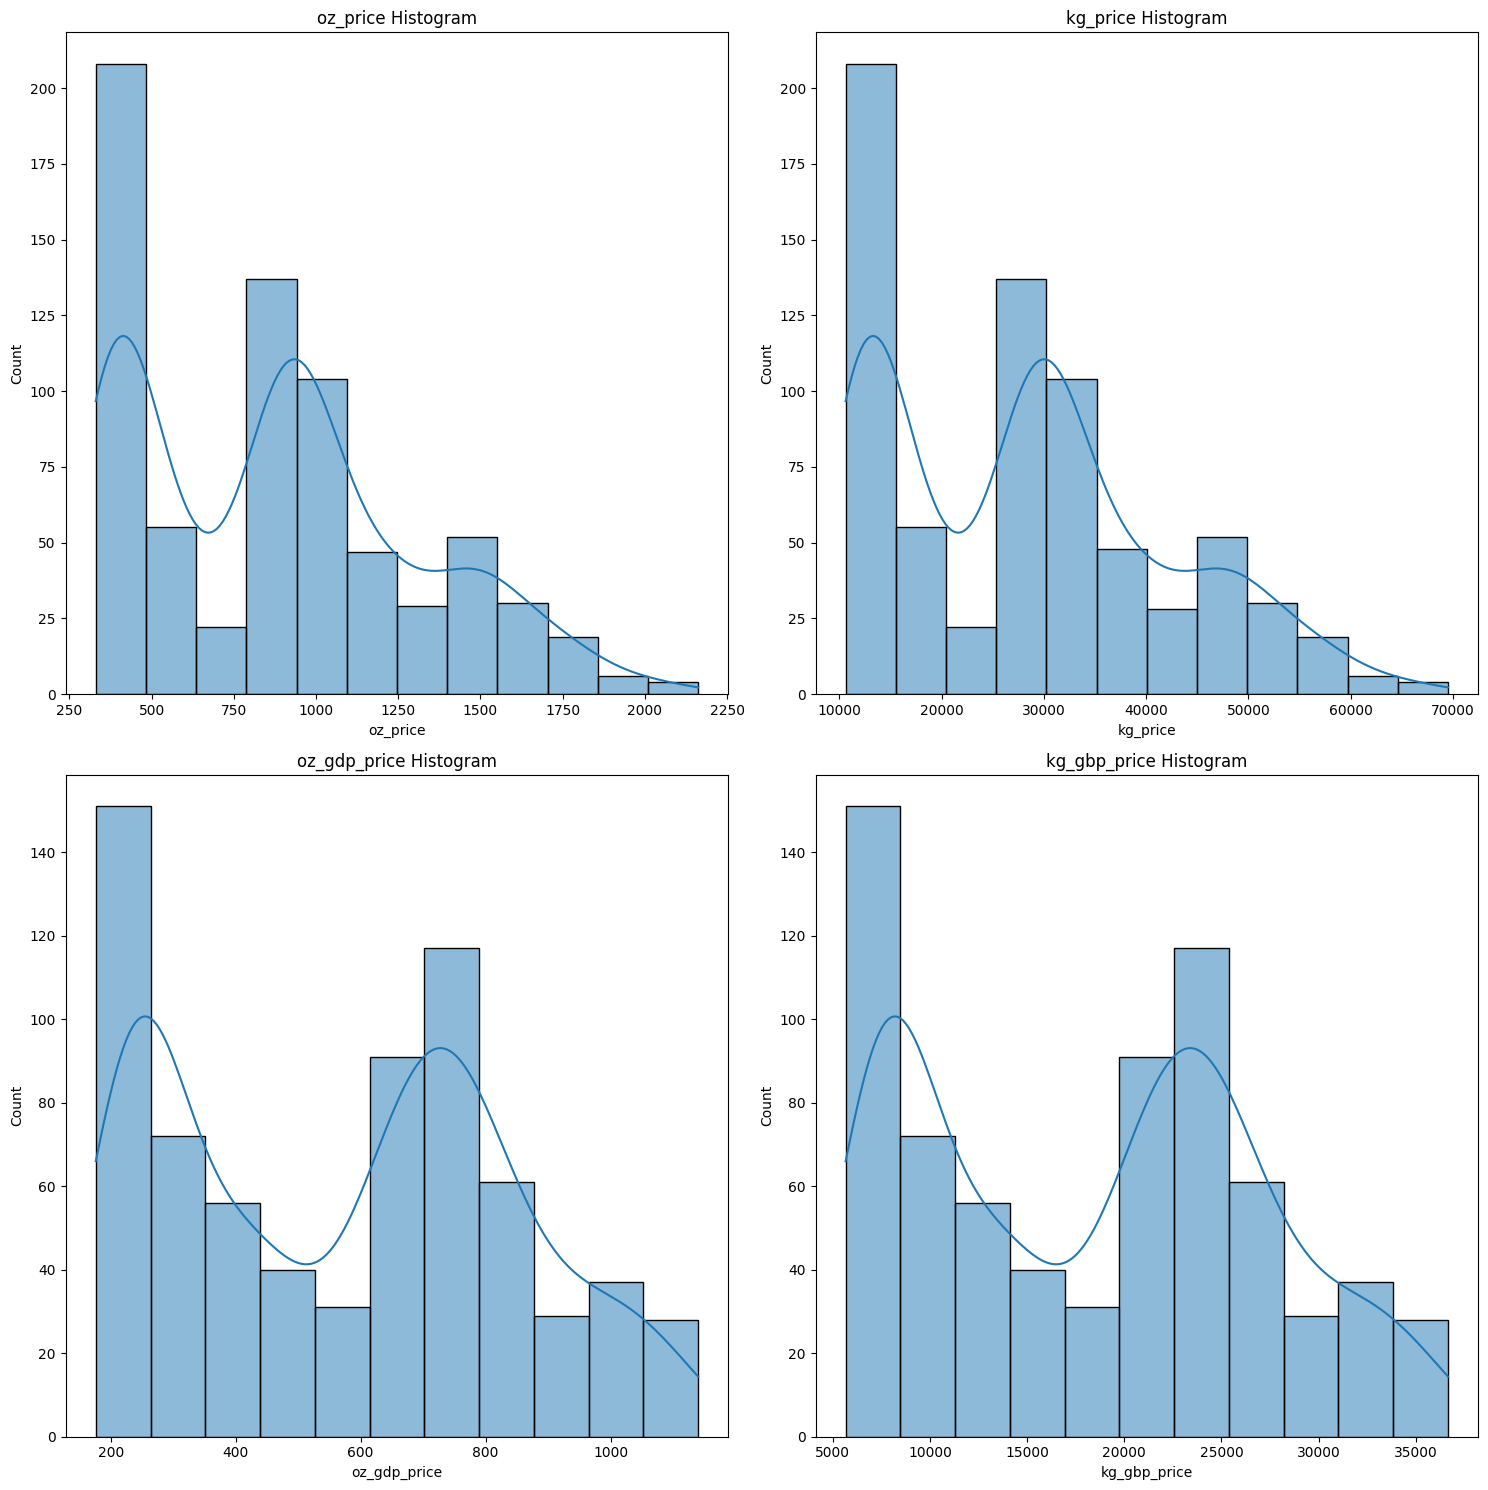

In [212]:
f, ax = plt.subplots(2,2, figsize=(15, 15))
ax = ax.flatten()

for index, cols in enumerate(cols_):
    sns.histplot(data=platinum, x= cols, ax = ax[index],kde=True)
    ax[index].set_title(f'{cols} Histogram')
    
plt.tight_layout()
plt.show()  

**silver**

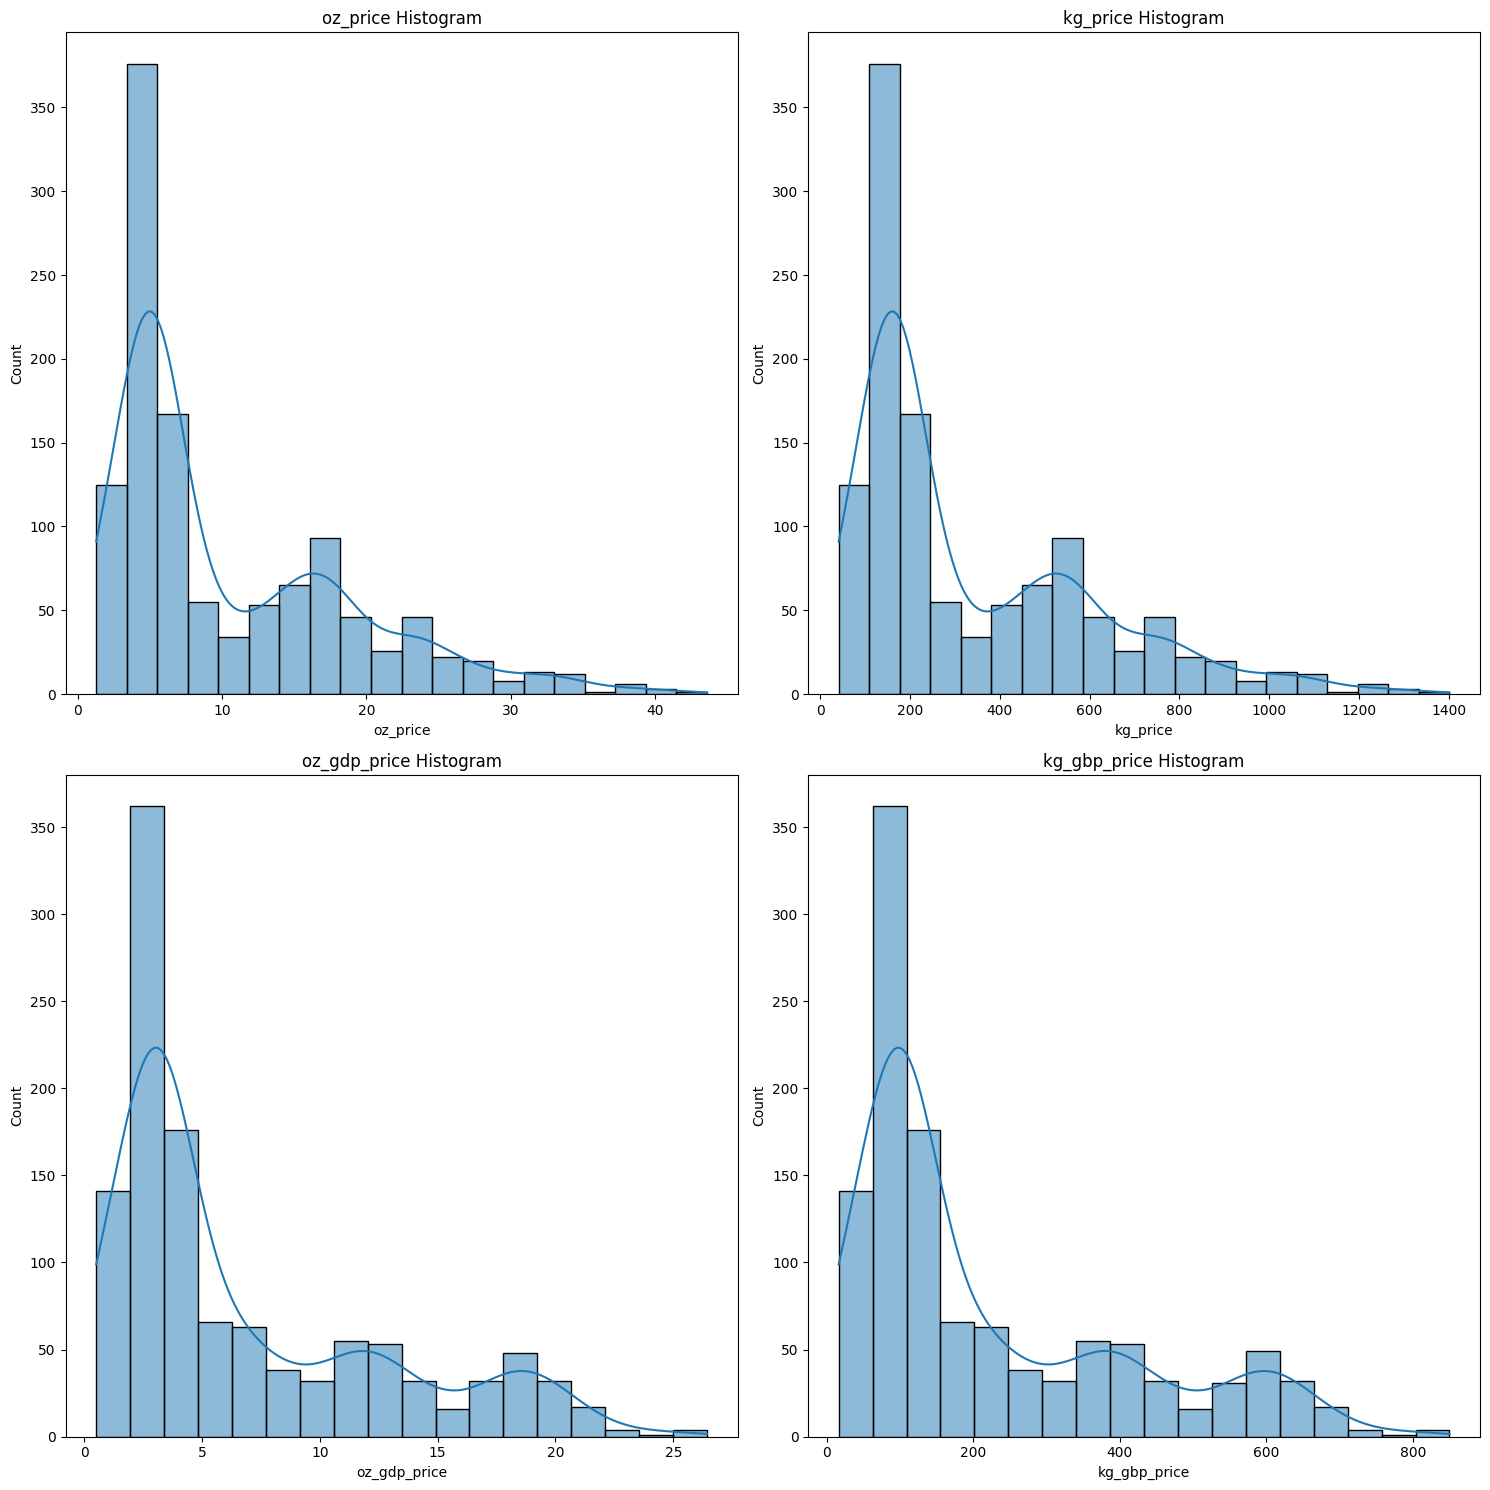

In [213]:
f, ax = plt.subplots(2,2, figsize=(15, 15))
ax = ax.flatten()

for index, cols in enumerate(cols_):
    sns.histplot(data=silver, x= cols, ax = ax[index],kde=True)
    ax[index].set_title(f'{cols} Histogram')
    
plt.tight_layout()
plt.show()  

**Gold Variables over time by variables**

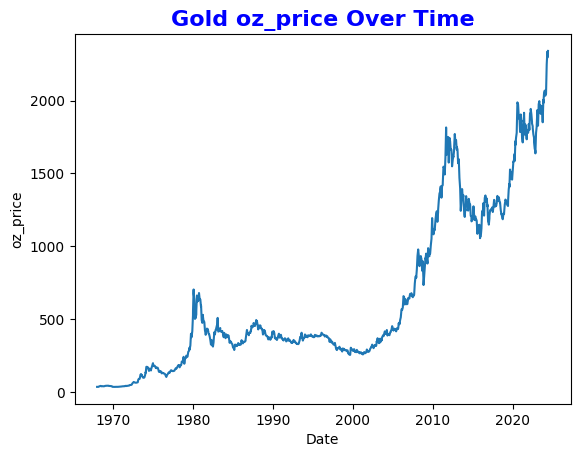

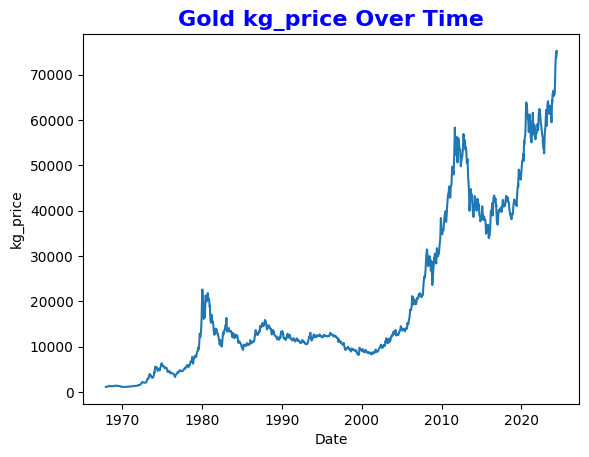

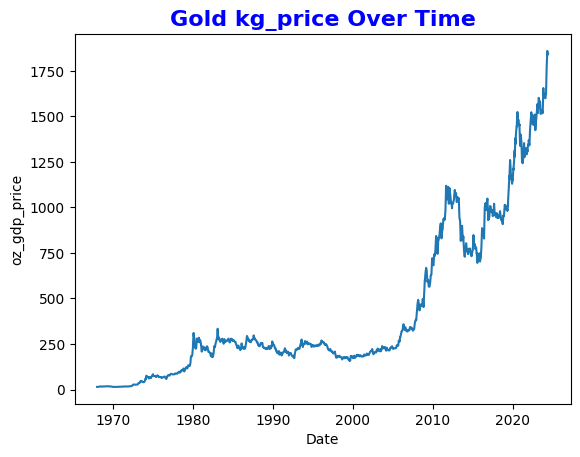

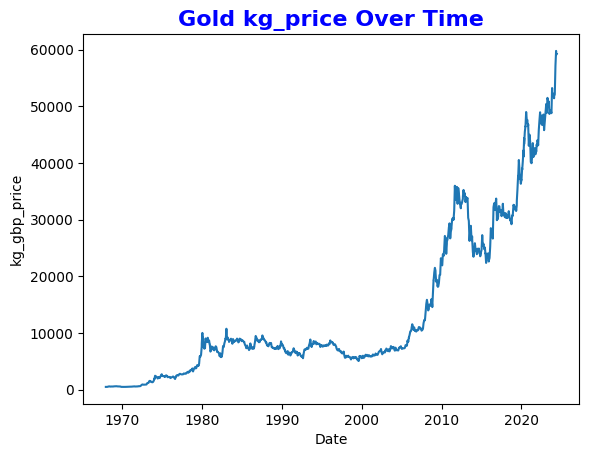

In [214]:
sns.lineplot(data=gold, x='Date', y='oz_price')
plt.title('Gold oz_price Over Time', fontsize=16, fontweight='bold', color='blue')
plt.show()

sns.lineplot(data=gold, x='Date', y='kg_price')
plt.title('Gold kg_price Over Time', fontsize=16, fontweight='bold', color='blue')
plt.show()

sns.lineplot(data=gold, x='Date', y='oz_gdp_price')
plt.title('Gold kg_price Over Time', fontsize=16, fontweight='bold', color='blue')
plt.show()

sns.lineplot(data=gold, x='Date', y='kg_gbp_price')
plt.title('Gold kg_price Over Time', fontsize=16, fontweight='bold', color='blue')
plt.show()

**Platinum Variables over time by variables**

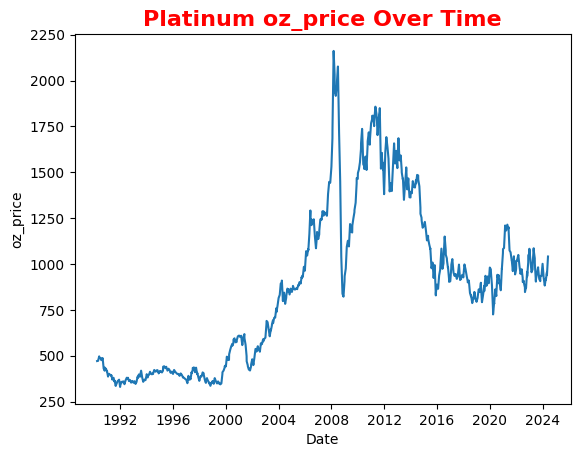

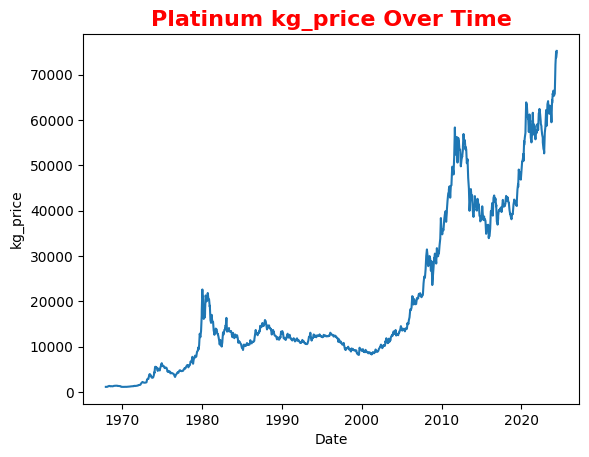

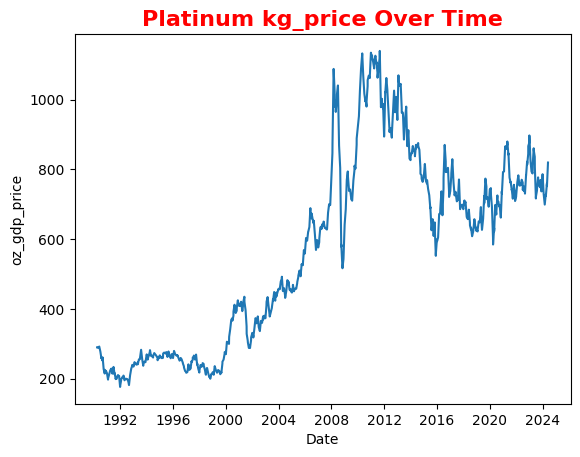

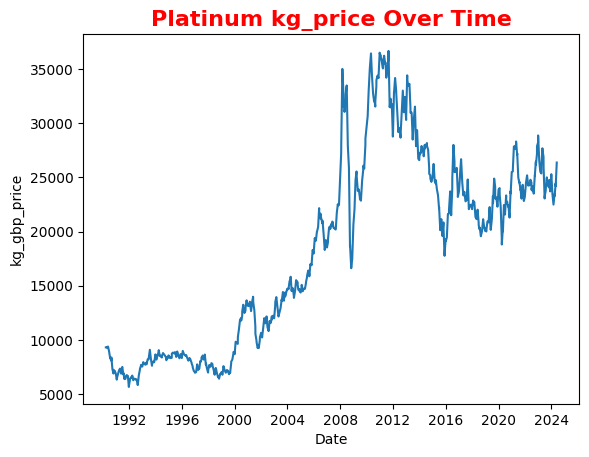

In [215]:
sns.lineplot(data=platinum, x='Date', y='oz_price')
plt.title('Platinum oz_price Over Time', fontsize=16, fontweight='bold', color='red')
plt.show()

sns.lineplot(data=gold, x='Date', y='kg_price')
plt.title('Platinum kg_price Over Time', fontsize=16, fontweight='bold', color='red')
plt.show()

sns.lineplot(data=platinum, x='Date', y='oz_gdp_price')
plt.title('Platinum kg_price Over Time', fontsize=16, fontweight='bold', color='red')
plt.show()

sns.lineplot(data=platinum, x='Date', y='kg_gbp_price')
plt.title('Platinum kg_price Over Time', fontsize=16, fontweight='bold', color='red')
plt.show()

**Silver Variables over time by variables**

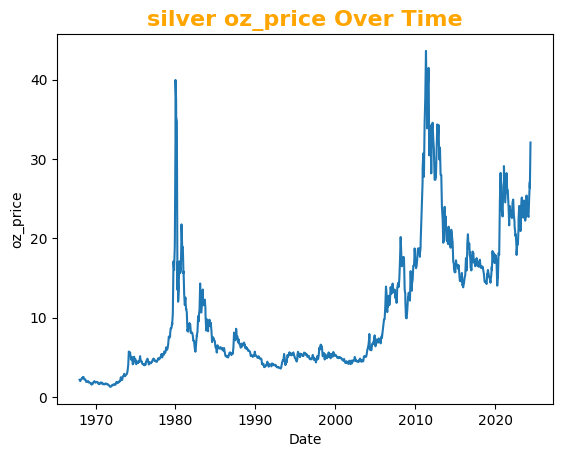

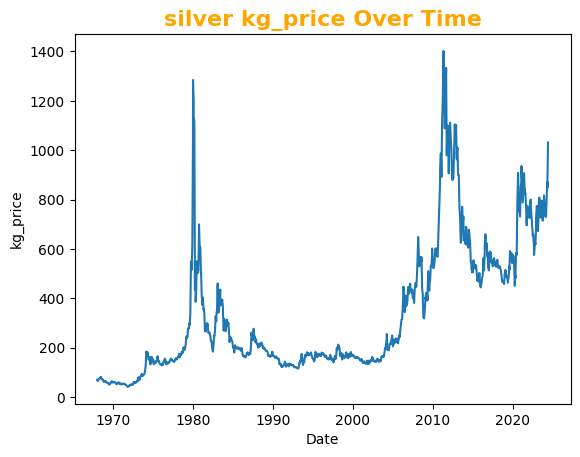

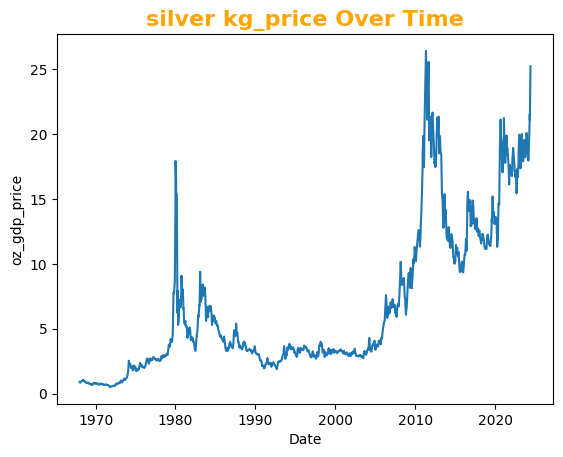

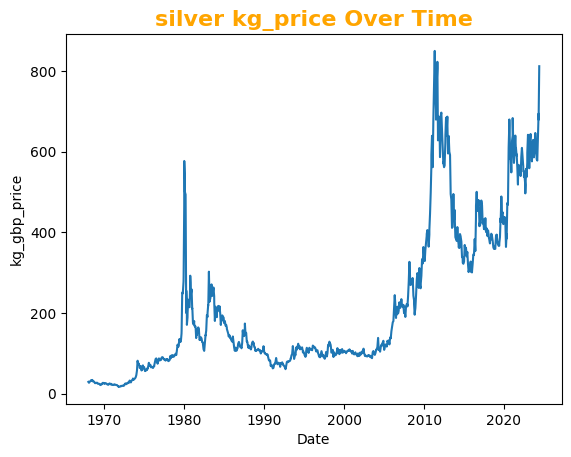

In [216]:
sns.lineplot(data=silver, x='Date', y='oz_price')
plt.title('silver oz_price Over Time', fontsize=16, fontweight='bold', color='orange')
plt.show()

sns.lineplot(data=silver, x='Date', y='kg_price')
plt.title('silver kg_price Over Time', fontsize=16, fontweight='bold', color='orange')
plt.show()

sns.lineplot(data=silver, x='Date', y='oz_gdp_price')
plt.title('silver kg_price Over Time', fontsize=16, fontweight='bold', color='orange')
plt.show()

sns.lineplot(data=silver, x='Date', y='kg_gbp_price')
plt.title('silver kg_price Over Time', fontsize=16, fontweight='bold', color='orange')
plt.show()

**Calculate rolling window statistics**

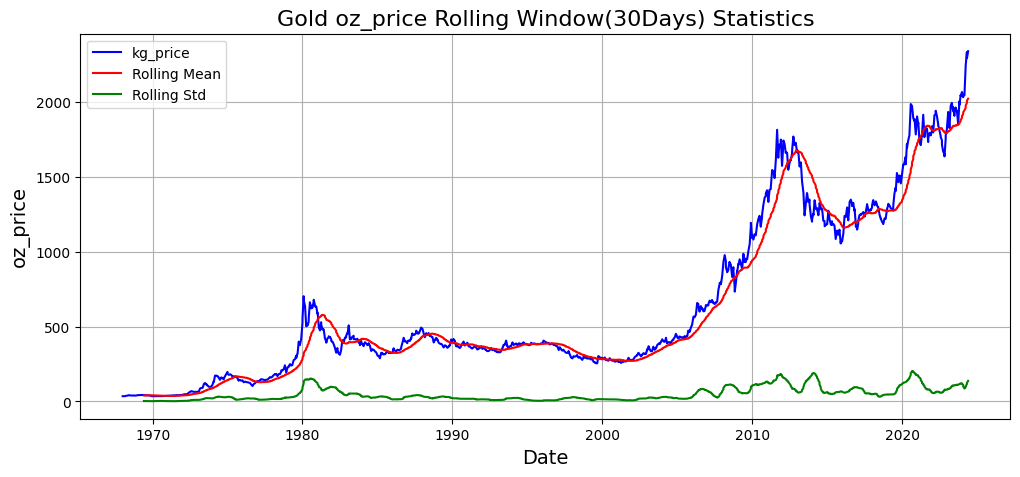

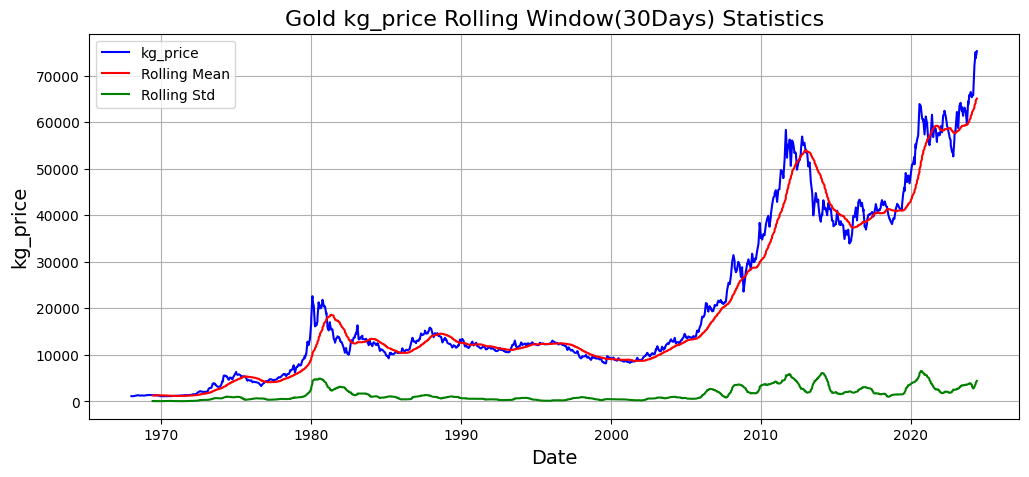

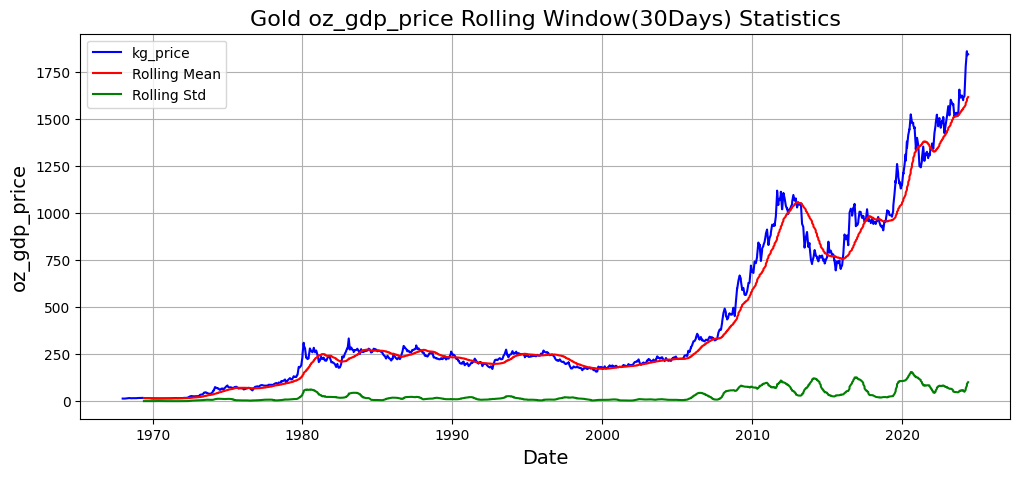

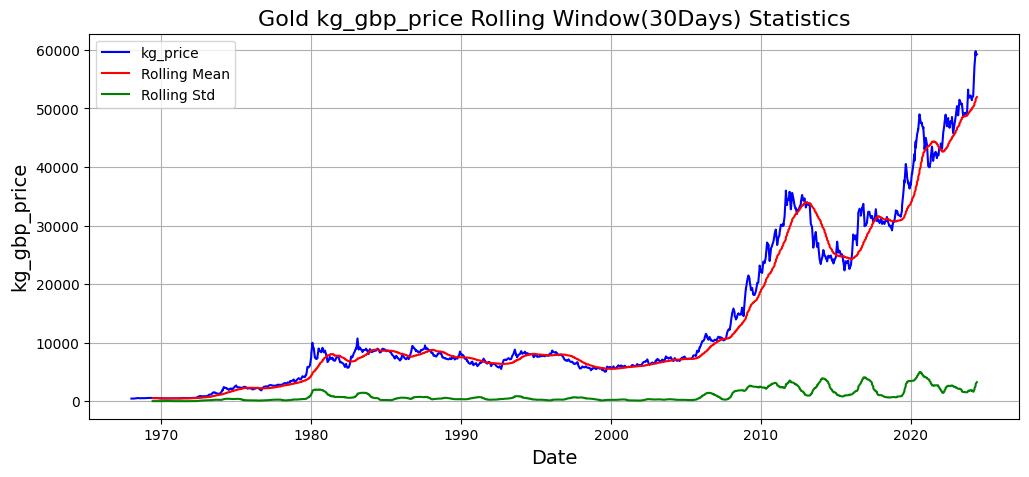

In [217]:
for index, cols in enumerate(cols_):
    rolling_mean = gold[cols].rolling(window=30).mean()
    rolling_std = gold[cols].rolling(window=30).std()
    
    plt.figure(figsize=(12,5))
    
    plt.plot(gold['Date'], gold[cols], label='kg_price', color='blue')
    plt.plot(gold['Date'], rolling_mean, label='Rolling Mean', color='red')
    plt.plot(gold['Date'], rolling_std, label='Rolling Std', color='green')
    plt.title(f'Gold {cols} Rolling Window(30Days) Statistics', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel(cols, fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

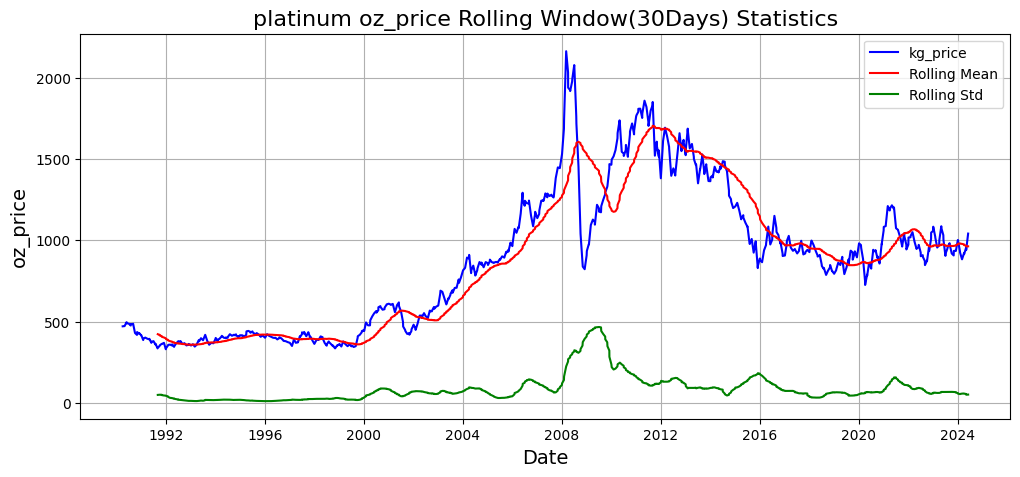

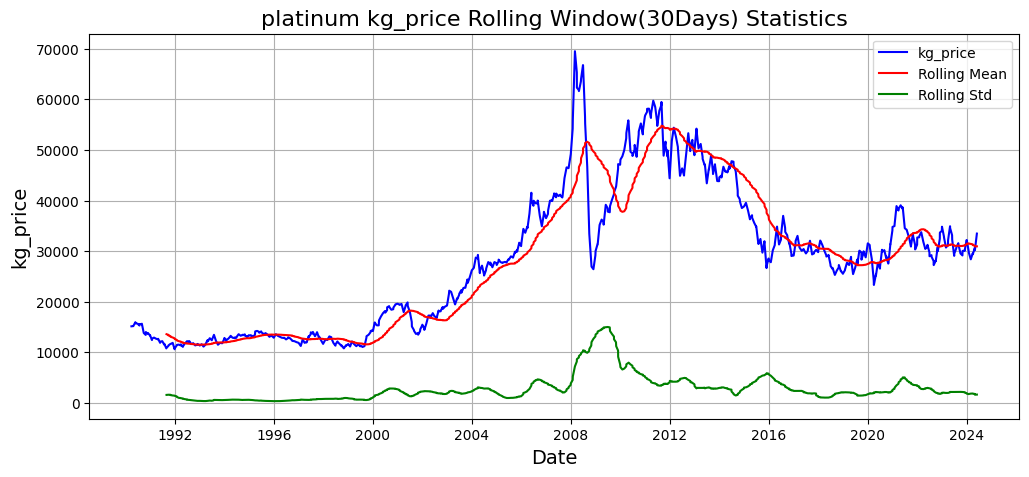

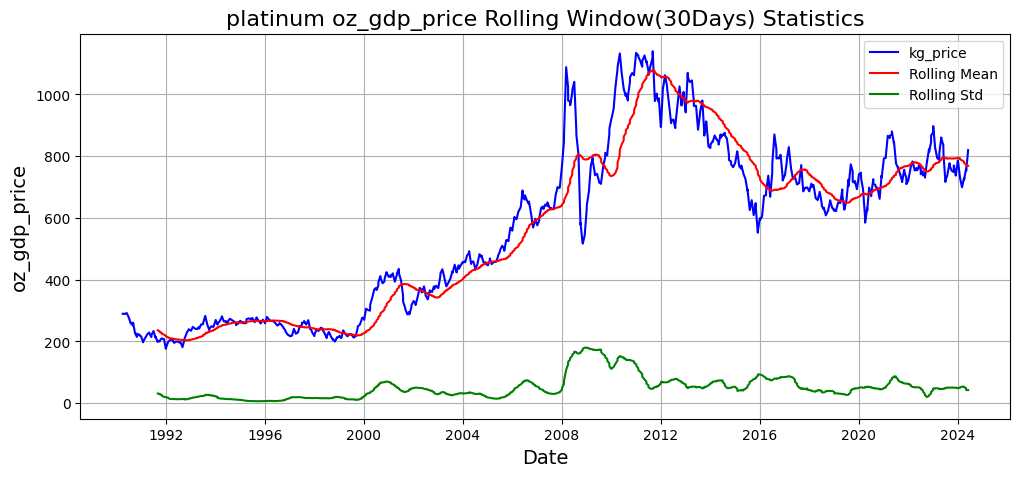

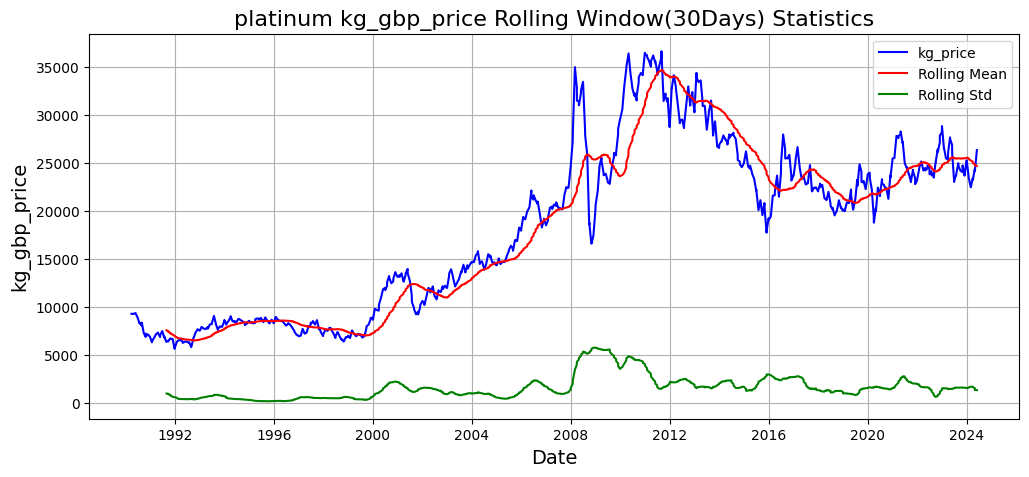

In [218]:
for index, cols in enumerate(cols_):
    rolling_mean = platinum[cols].rolling(window=30).mean()
    rolling_std = platinum[cols].rolling(window=30).std()
    
    plt.figure(figsize=(12,5))
    
    plt.plot(platinum['Date'], platinum[cols], label='kg_price', color='blue')
    plt.plot(platinum['Date'], rolling_mean, label='Rolling Mean', color='red')
    plt.plot(platinum['Date'], rolling_std, label='Rolling Std', color='green')
    plt.title(f'platinum {cols} Rolling Window(30Days) Statistics', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel(cols, fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

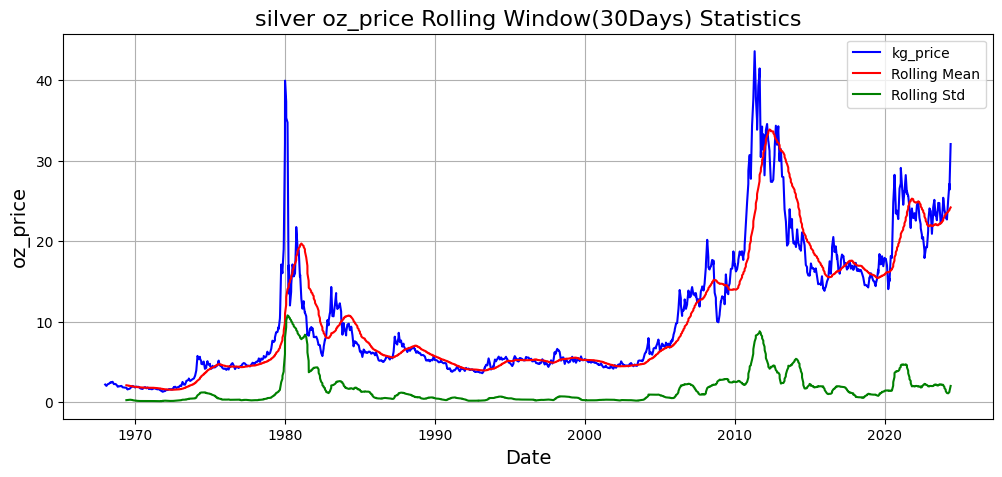

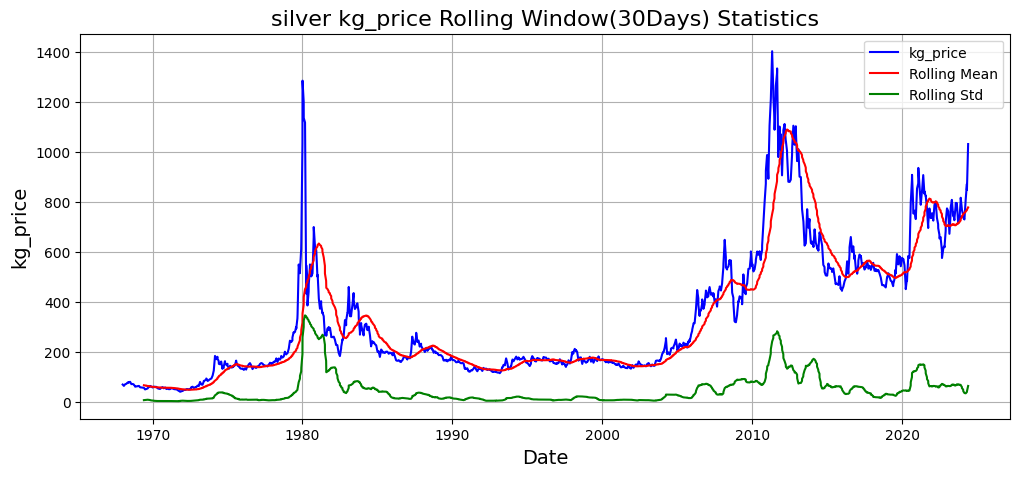

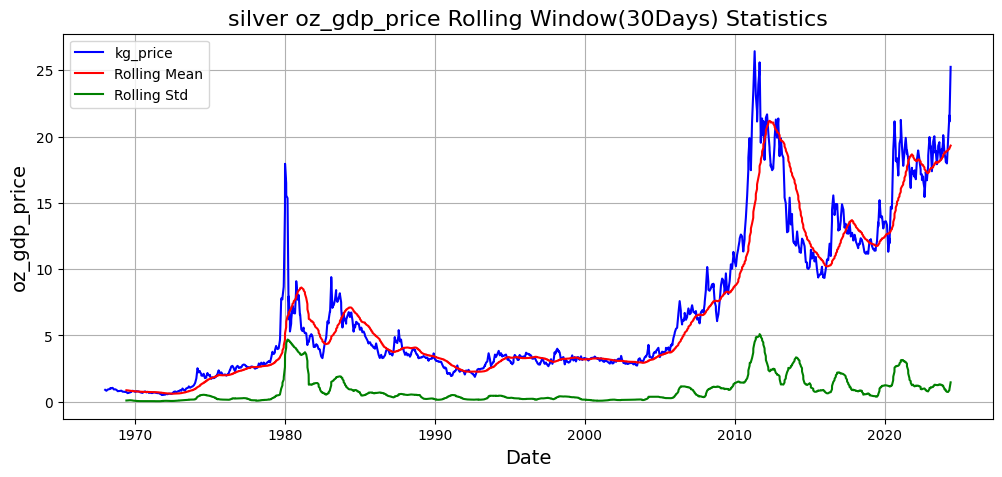

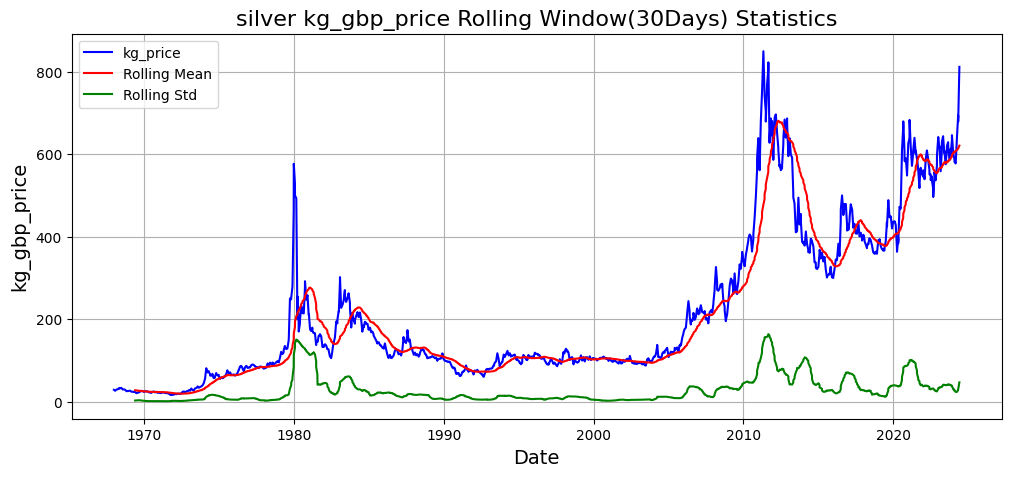

In [219]:
for index, cols in enumerate(cols_):
    rolling_mean = silver[cols].rolling(window=30).mean()
    rolling_std = silver[cols].rolling(window=30).std()
    
    plt.figure(figsize=(12,5))
    
    plt.plot(silver['Date'], silver[cols], label='kg_price', color='blue')
    plt.plot(silver['Date'], rolling_mean, label='Rolling Mean', color='red')
    plt.plot(silver['Date'], rolling_std, label='Rolling Std', color='green')
    plt.title(f'silver {cols} Rolling Window(30Days) Statistics', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel(cols, fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

**Plot partial autocorrelation function (ACF, PACF)**

<Figure size 1200x600 with 0 Axes>

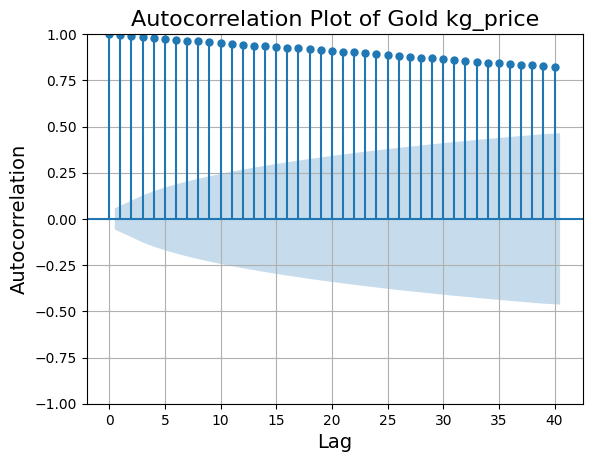

<Figure size 1200x600 with 0 Axes>

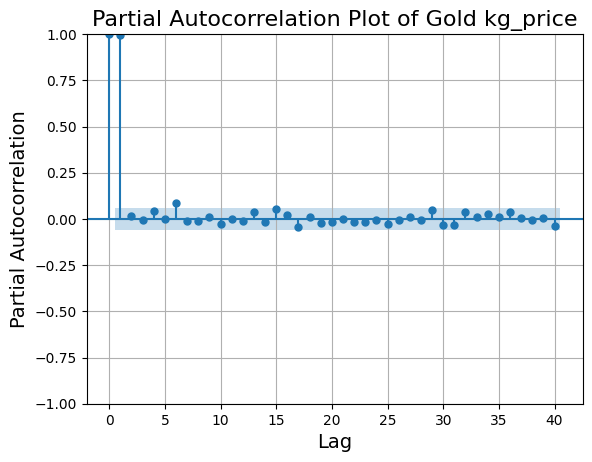

In [220]:
plt.figure(figsize=(12, 6))
plot_acf(gold['kg_price'], lags=40, alpha=0.05)
plt.title('Autocorrelation Plot of Gold kg_price', fontsize=16)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Autocorrelation', fontsize=14)
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plot_pacf(gold['kg_price'], lags=40, alpha=0.05)
plt.title('Partial Autocorrelation Plot of Gold kg_price', fontsize=16)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Partial Autocorrelation', fontsize=14)
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

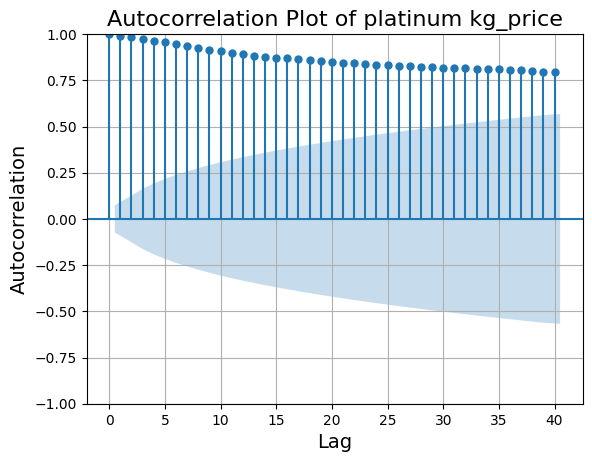

<Figure size 1200x600 with 0 Axes>

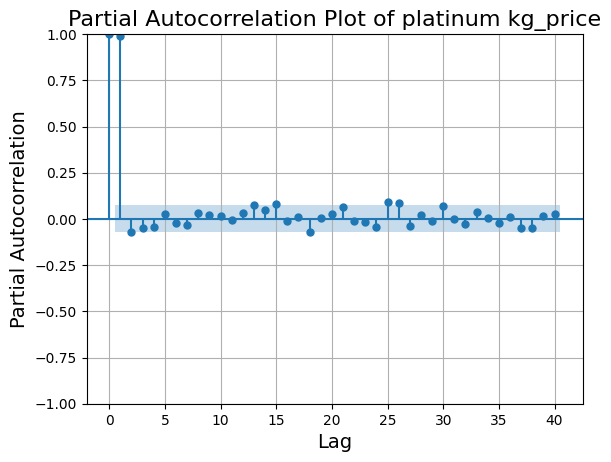

In [221]:
plt.figure(figsize=(12, 6))
plot_acf(platinum['kg_price'], lags=40, alpha=0.05)
plt.title('Autocorrelation Plot of platinum kg_price', fontsize=16)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Autocorrelation', fontsize=14)
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plot_pacf(platinum['kg_price'], lags=40, alpha=0.05)
plt.title('Partial Autocorrelation Plot of platinum kg_price', fontsize=16)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Partial Autocorrelation', fontsize=14)
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

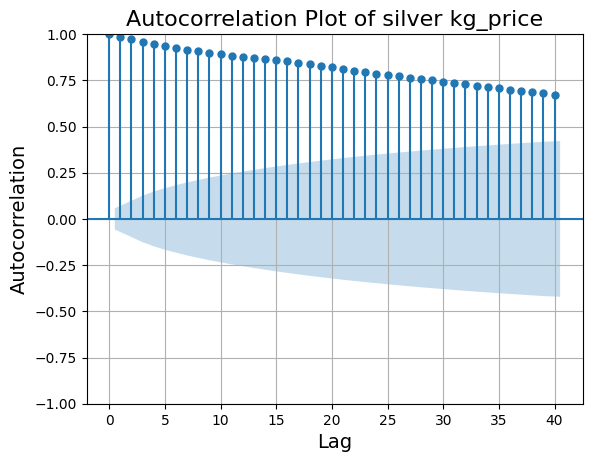

<Figure size 1200x600 with 0 Axes>

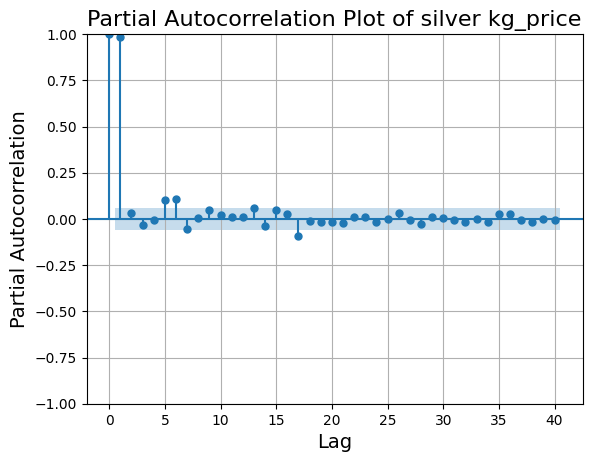

In [222]:
plt.figure(figsize=(12, 6))
plot_acf(silver['kg_price'], lags=40, alpha=0.05)
plt.title('Autocorrelation Plot of silver kg_price', fontsize=16)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Autocorrelation', fontsize=14)
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plot_pacf(silver['kg_price'], lags=40, alpha=0.05)
plt.title('Partial Autocorrelation Plot of silver kg_price', fontsize=16)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Partial Autocorrelation', fontsize=14)
plt.grid(True)
plt.show()

# **4. Modeling**

In [223]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [224]:
ts_gold = gold[['Date','kg_price']]

In [225]:
ts_gold.index = ts_gold['Date']
ts_gold.set_index('Date', inplace=True)

In [226]:
ts_gold

,kg_price
Date,
1968-01-02,1131.06
1968-01-30,1131.38
1968-02-01,1131.70
1968-03-01,1131.70
1968-04-01,1221.73
...,...
2024-03-30,71960.98
2024-04-01,72266.09
2024-04-30,75081.53


In [227]:
# Determination of stationary time series  
# p-value > 0.05 is Non-stationary time series

def adf_test(data):
    result = adfuller(data.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('num of lags: %f' % result[2])
    print('num of observations: %f' % result[3])
    print('Critical values:')
    for k, v in result[4].items():
        print('\t%s: %.3f' % (k,v))
        
adf_test(ts_gold)

ADF Statistics: 0.888753
p-value: 0.992942
num of lags: 21.000000
num of observations: 1150.000000
Critical values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


<Axes: xlabel='Date'>

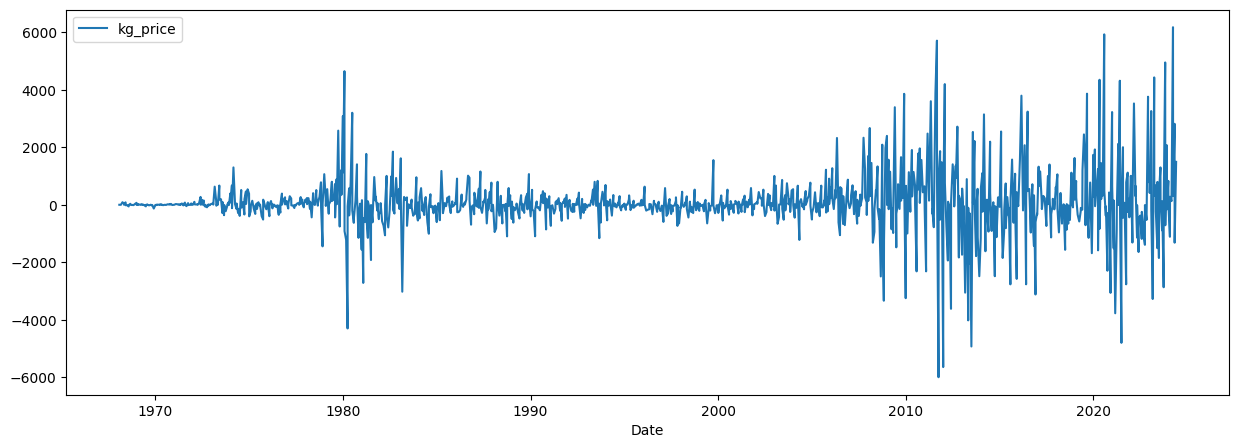

In [228]:
# difference
dff1 = ts_gold.diff().dropna()
dff1.plot(figsize=(15,5))

In [229]:
adf_test(dff1)

ADF Statistics: -5.705600
p-value: 0.000001
num of lags: 20.000000
num of observations: 1150.000000
Critical values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


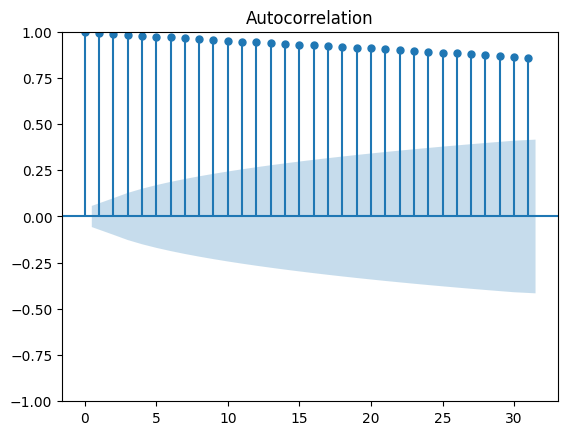

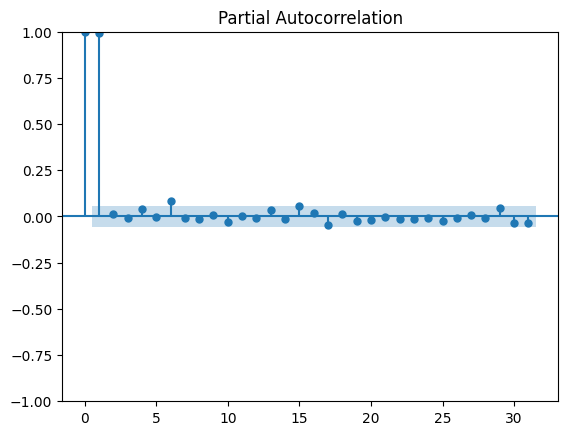

In [230]:
plot_acf(ts_gold)
plot_pacf(ts_gold)
plt.show()

**AR(1)**

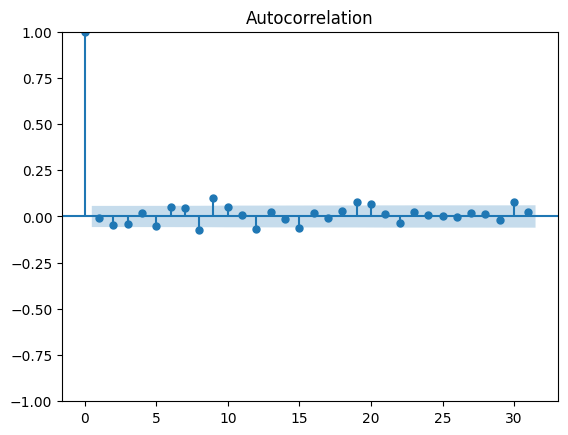

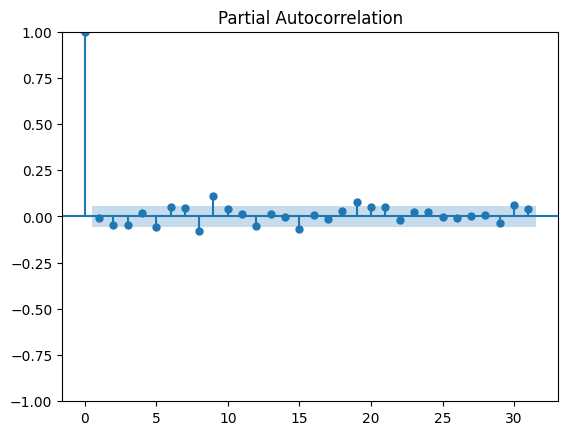

In [231]:
plot_acf(dff1)
plot_pacf(dff1)
plt.show()

**D(1) MA(0)**

In [232]:
model = sm.tsa.arima.ARIMA(ts_gold, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               kg_price   No. Observations:                 1172
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -9736.403
Date:                Fri, 07 Jun 2024   AIC                          19476.805
Time:                        13:31:34   BIC                          19486.937
Sample:                             0   HQIC                         19480.626
                               - 1172                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0034      0.024     -0.145      0.885      -0.050       0.043
sigma2      9.769e+05   1.61e+04     60.587      0.000    9.45e+05    1.01e+06
Ljung-Box (L1) (Q):                   0.02   Jarque-

In [233]:
model = sm.tsa.arima.ARIMA(ts_gold, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               kg_price   No. Observations:                 1172
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -9736.410
Date:                Fri, 07 Jun 2024   AIC                          19474.819
Time:                        13:31:34   BIC                          19479.885
Sample:                             0   HQIC                         19476.730
                               - 1172                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      9.753e+05   1.61e+04     60.717      0.000    9.44e+05    1.01e+06
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              5459.59
Prob(Q):                              0.80   Pr

In [234]:
pred = model_fit.predict()

In [235]:
pred = pd.DataFrame(pred)

In [238]:
ts_gold

,kg_price
Date,
1968-01-02,1131.06
1968-01-30,1131.38
1968-02-01,1131.70
1968-03-01,1131.70
1968-04-01,1221.73
...,...
2024-03-30,71960.98
2024-04-01,72266.09
2024-04-30,75081.53


In [236]:
pred

,predicted_mean
Date,
1968-01-02,0.00
1968-01-30,1131.06
1968-02-01,1131.38
1968-03-01,1131.70
1968-04-01,1131.70
...,...
2024-03-30,65786.76
2024-04-01,71960.98
2024-04-30,72266.09


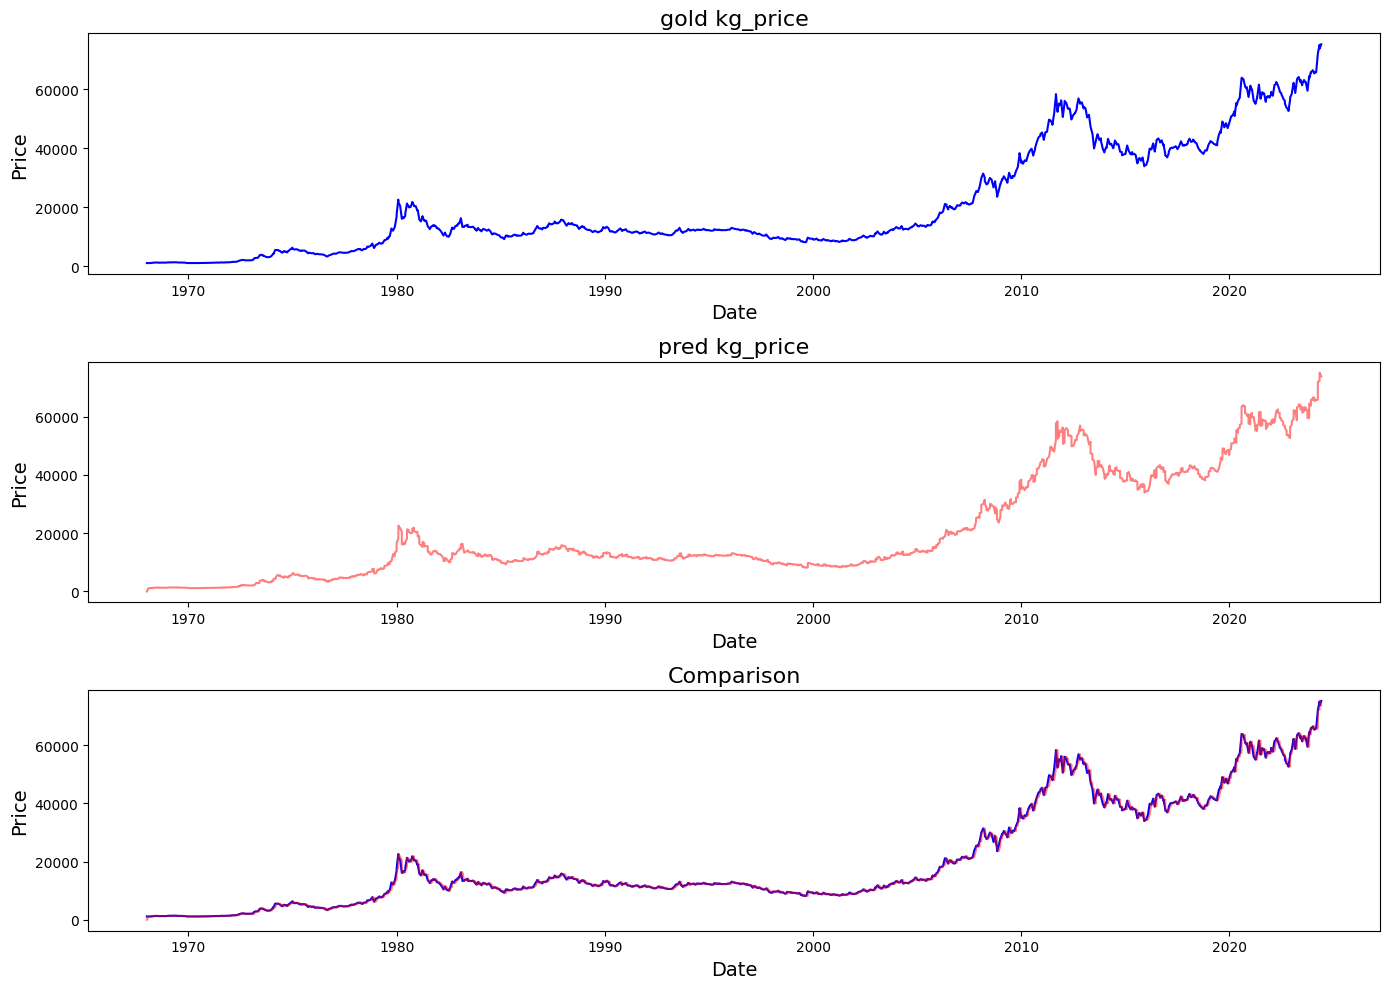

In [237]:
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
plt.plot(gold['Date'], gold['kg_price'], label='kg_price', color='blue')
plt.title('gold kg_price', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.subplot(3, 1, 2)
plt.plot(pred.index, pred['predicted_mean'], label = 'predicted_mean', color = 'red', alpha = 0.5)
plt.title('pred kg_price', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.subplot(3, 1, 3)
plt.plot(gold['Date'], gold['kg_price'], label='kg_price', color='blue')
plt.plot(pred.index, pred['predicted_mean'], label = 'predicted_mean', color = 'red', alpha = 0.5)
plt.title('Comparison', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.tight_layout()
plt.show()

**Please leave your advice in the comments. Thank you**